# Alucar - Analisando as vendas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alucar = pd.read_csv('dataset/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [4]:
print(f'Quantidades de dados nulos: {alucar.isna().sum().sum()}')

Quantidades de dados nulos: 0


In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
print(sns.__version__)

0.11.1


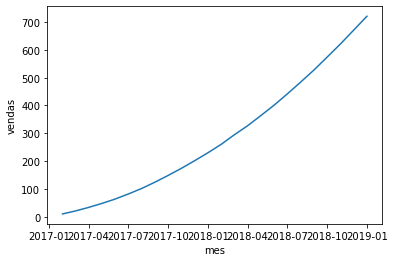

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.show()

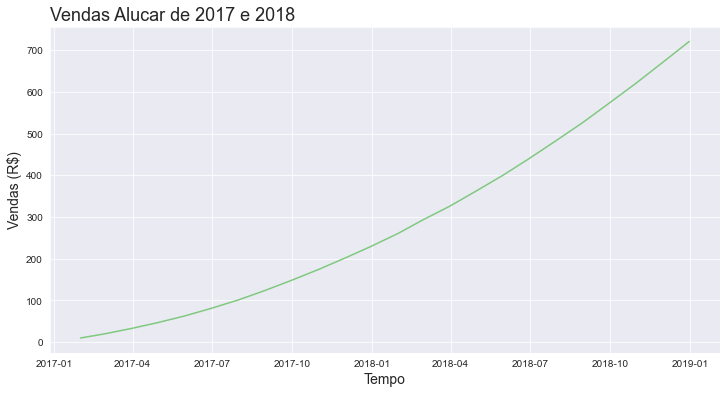

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.show()

In [12]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


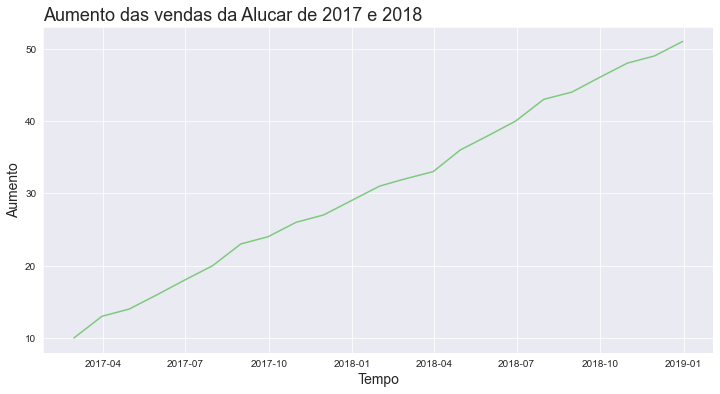

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
plt.show()

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    plt.show()

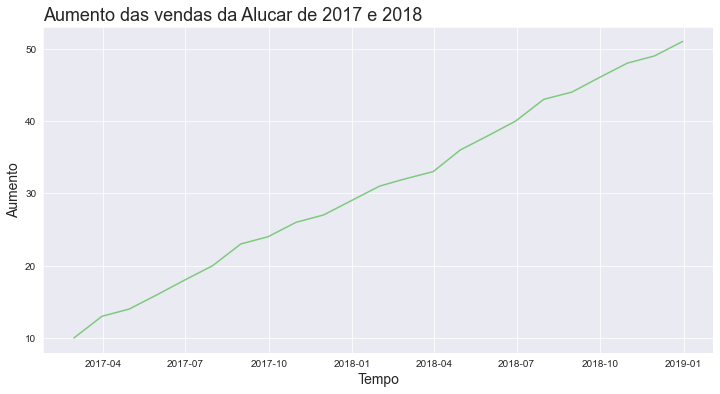

In [15]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


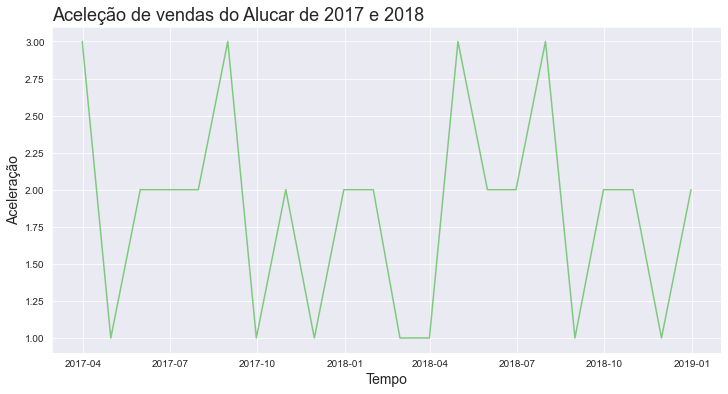

In [17]:
plotar('Aceleção de vendas do Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

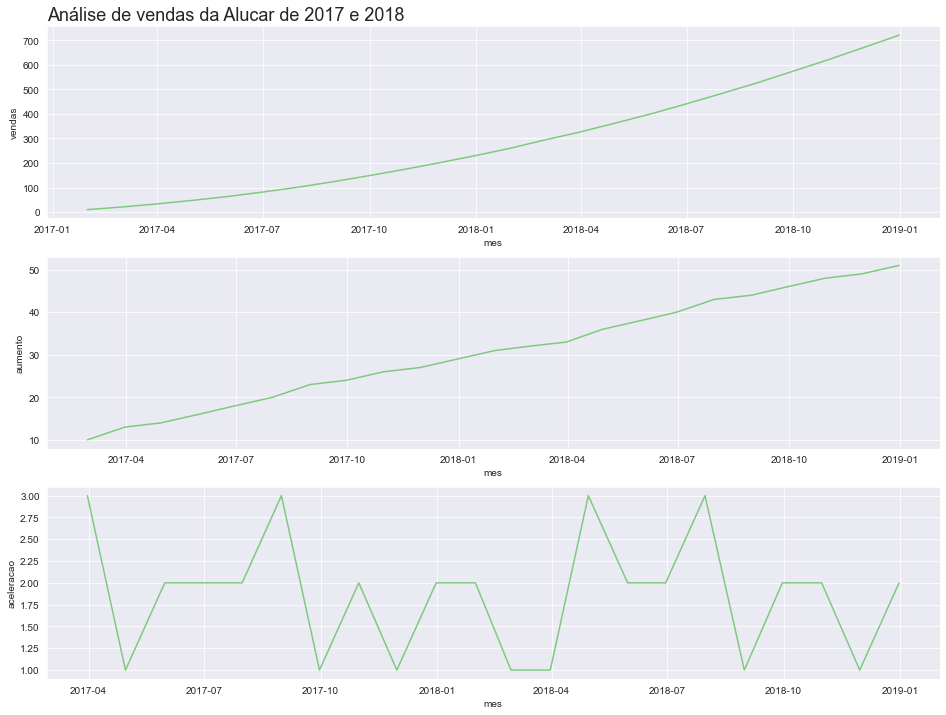

In [18]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)

In [36]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=dataset)

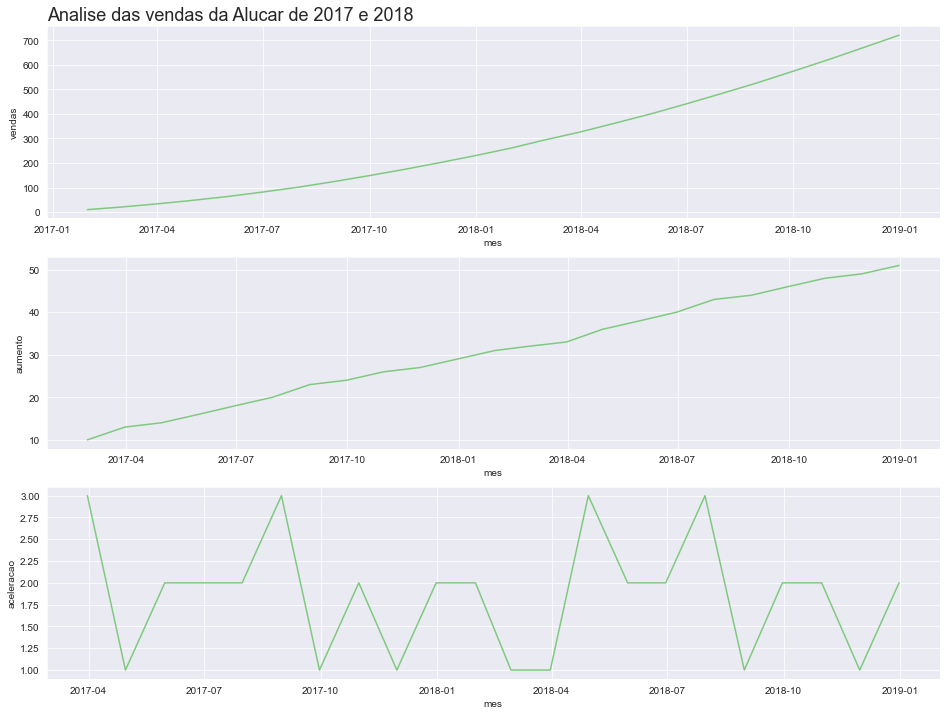

In [37]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Analise das vendas da Alucar de 2017 e 2018')

In [21]:
from pandas.plotting import autocorrelation_plot

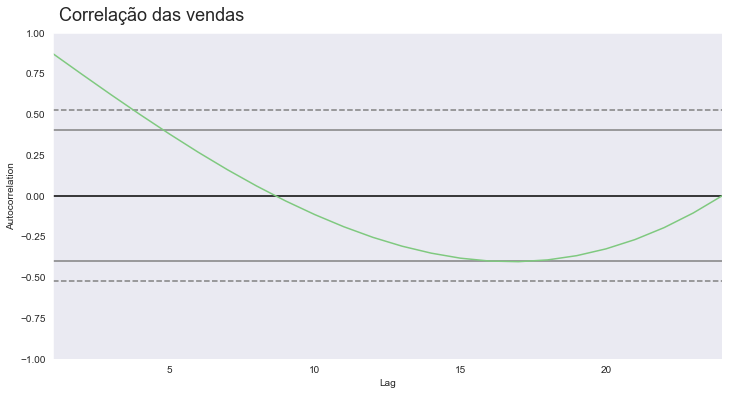

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['vendas'])
plt.show()

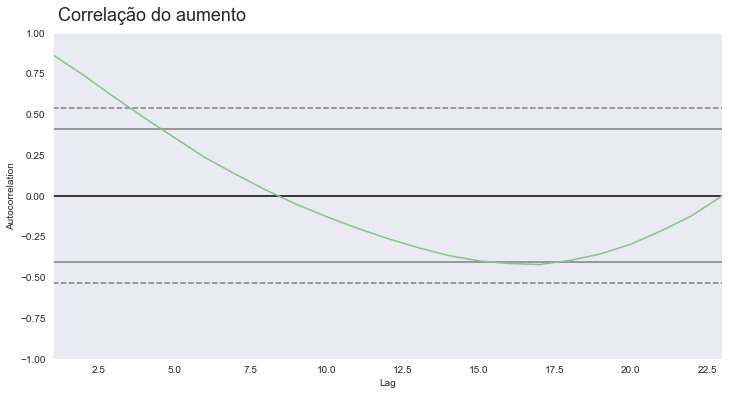

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['aumento'][1:])
plt.show()

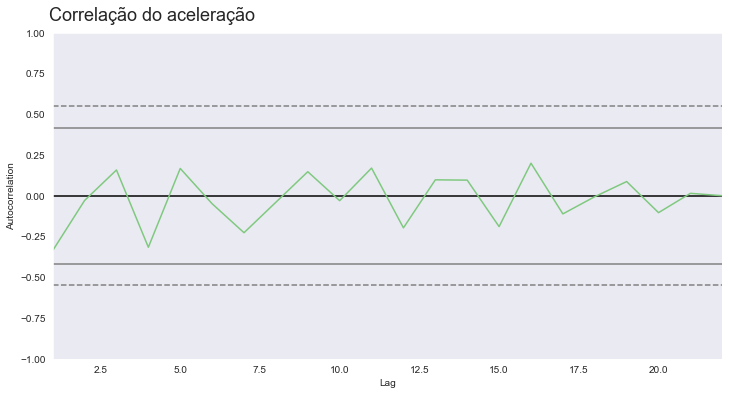

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleração', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['aceleracao'][2:])
plt.show()

## Alucar - Analisando as assinantes da newsletter

In [26]:
assinantes = pd.read_csv('dataset/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print(f'Quantidade de linhas e colunas: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [30]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [33]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


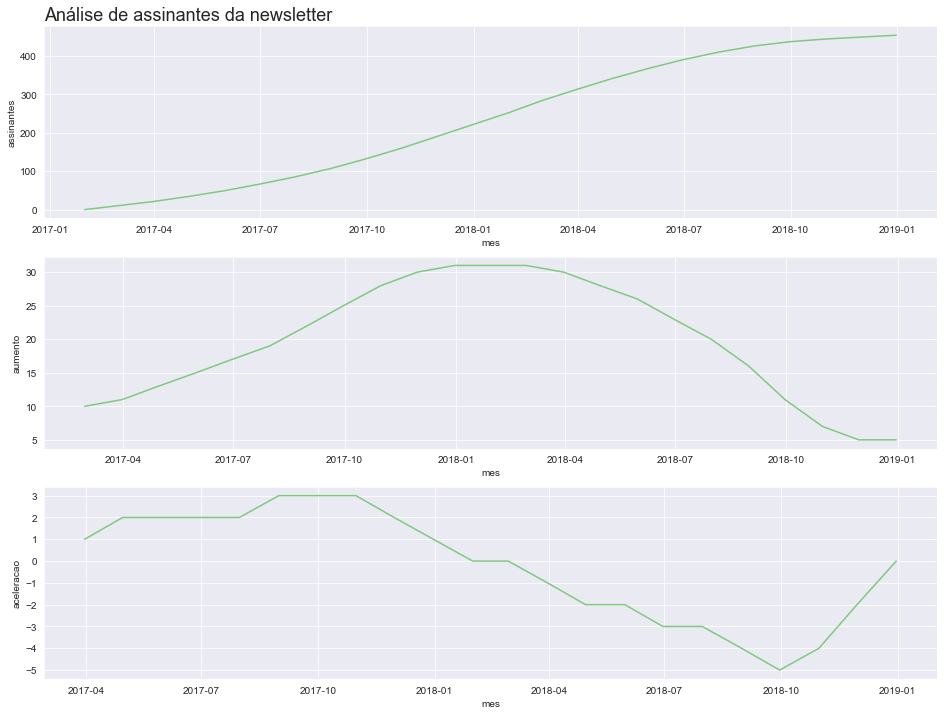

In [38]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

## Chocolura - Analisando as vendas

In [40]:
chocolura = pd.read_csv('dataset/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [41]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [42]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [43]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [44]:
print(f'Quantidade de linhas e colunas: {chocolura.shape}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [45]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


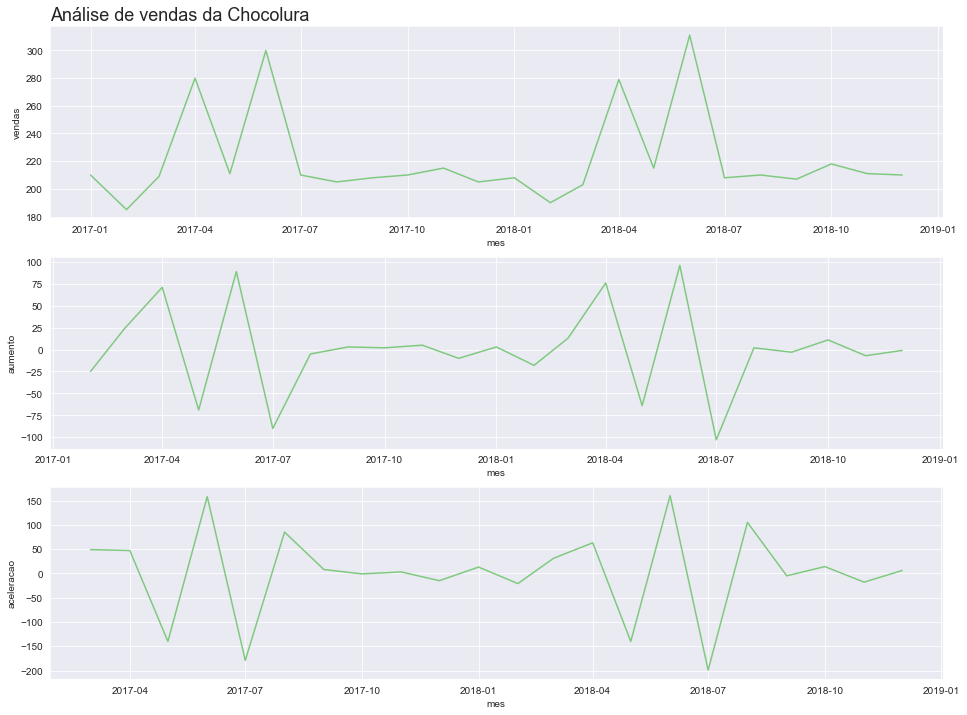

In [46]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura')

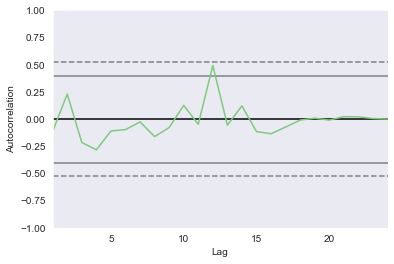

In [48]:
autocorrelation_plot(chocolura['vendas'])
plt.show()

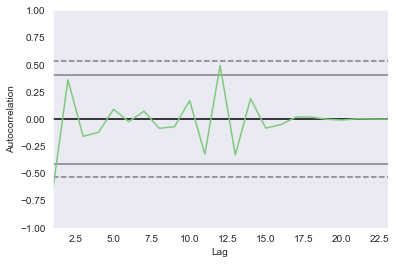

In [50]:
autocorrelation_plot(chocolura['aumento'][1:])
plt.show()

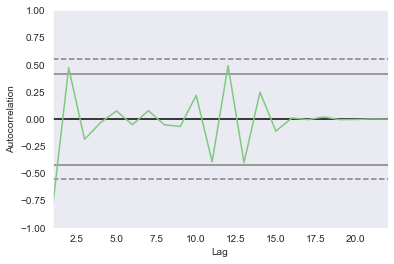

In [51]:
autocorrelation_plot(chocolura['aceleracao'][2:])
plt.show()

## Chocolura - Vendas diárias (Outubro e Novembro)

In [86]:
vendas_por_dia = pd.read_csv('dataset/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [87]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [88]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [89]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [90]:
print(f'Quantidas de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}')

Quantidas de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [91]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


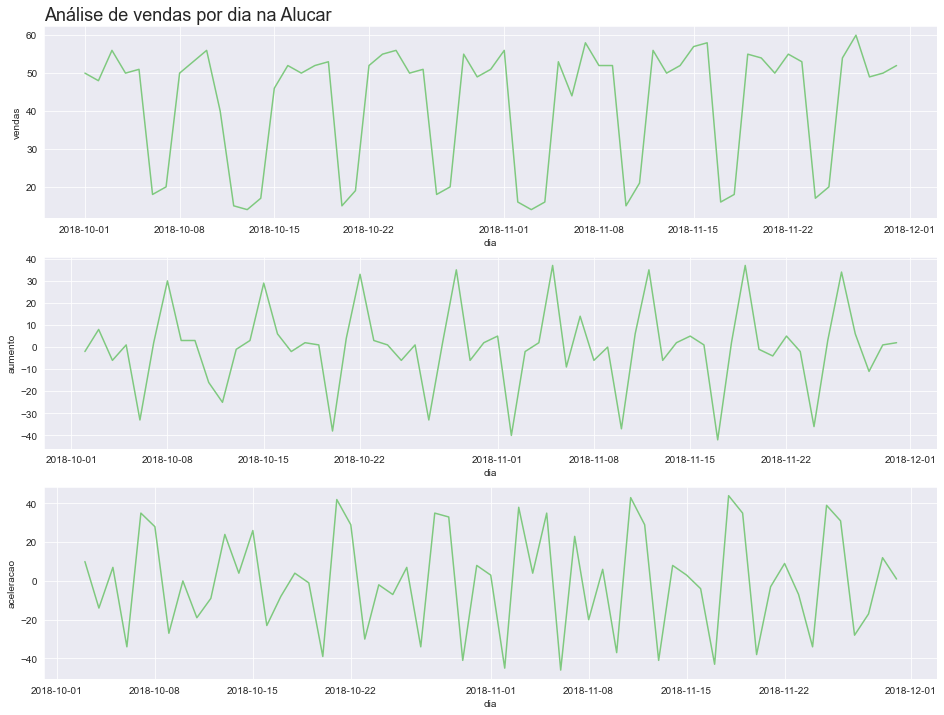

In [92]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas por dia na Alucar')

### Analisando a sazonalidade

In [93]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [94]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [95]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [96]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 
                   'Friday': 'Sexta', 'Saturday': 'Sabado', 'Sunday': 'Domingo'}

In [97]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


### Agrupando os dias

In [102]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


### Correlação das vendas diárias

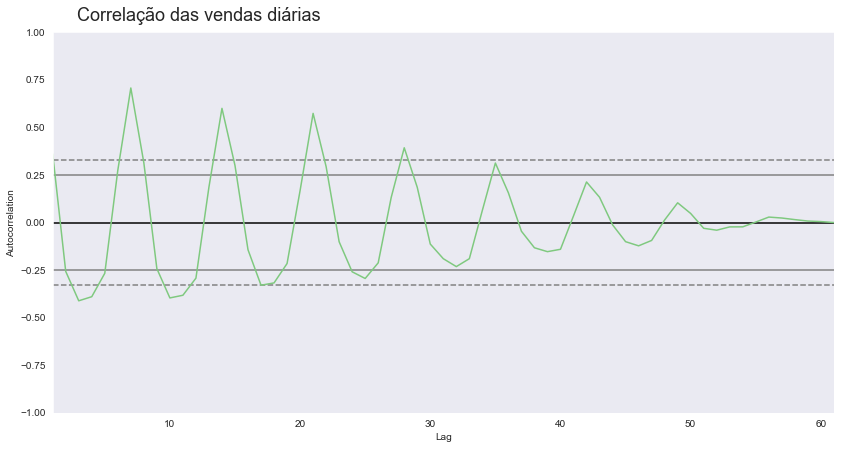

In [121]:
ax = plt.figure(figsize=(14,7))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.27, y=0.93)
autocorrelation_plot(vendas_por_dia['vendas'])
plt.show()

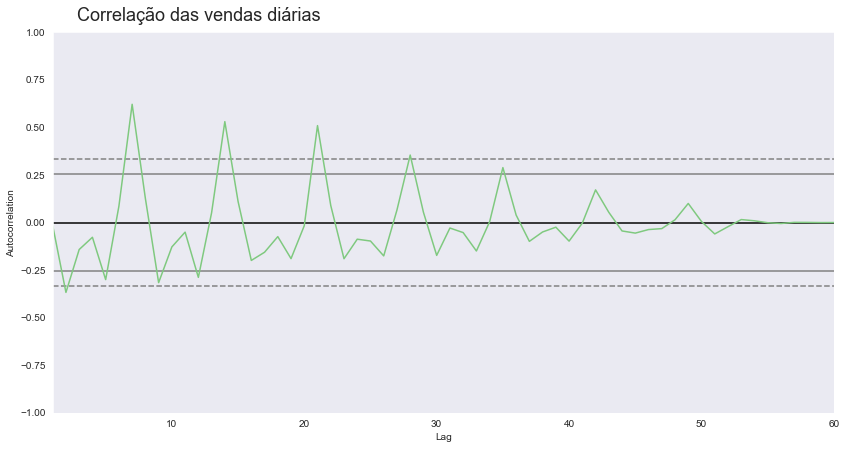

In [122]:
ax = plt.figure(figsize=(14,7))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.27, y=0.93)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
plt.show()

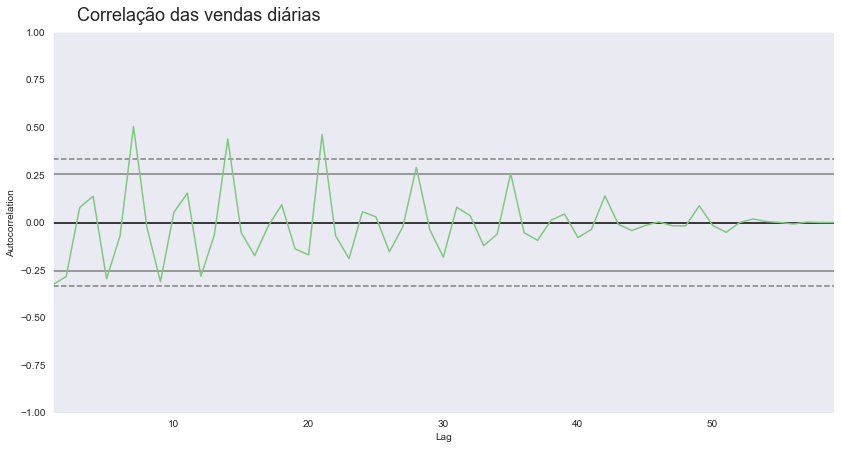

In [123]:
ax = plt.figure(figsize=(14,7))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.27, y=0.93)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
plt.show()

## Cafelura - Análise de vendas

In [124]:
cafelura = pd.read_csv('dataset/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [125]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [126]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [127]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [128]:
print(f'Quantidade de linhas e colunas: {cafelura.shape}')
print(f'Quantidade de observações nulas: {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de observações nulas: 0


In [129]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


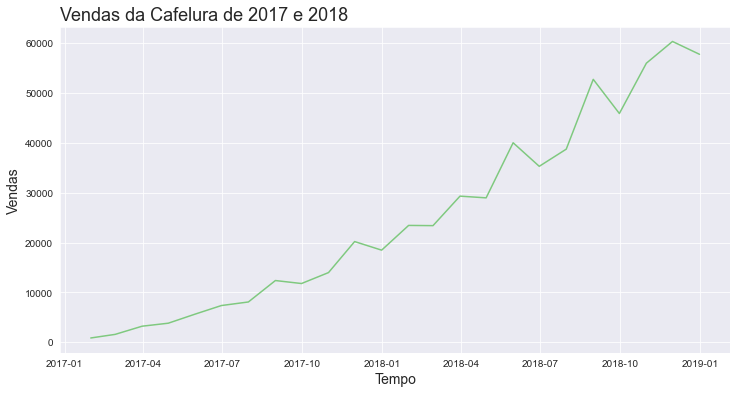

In [130]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [132]:
quantidade_de_dias_de_fds = pd.read_csv('dataset/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [135]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [136]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


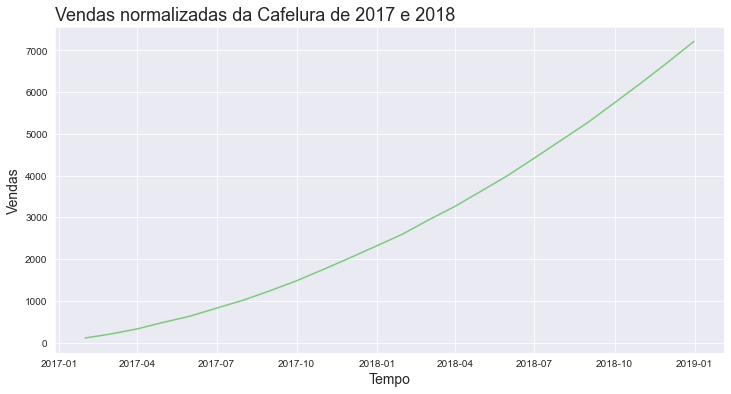

In [137]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

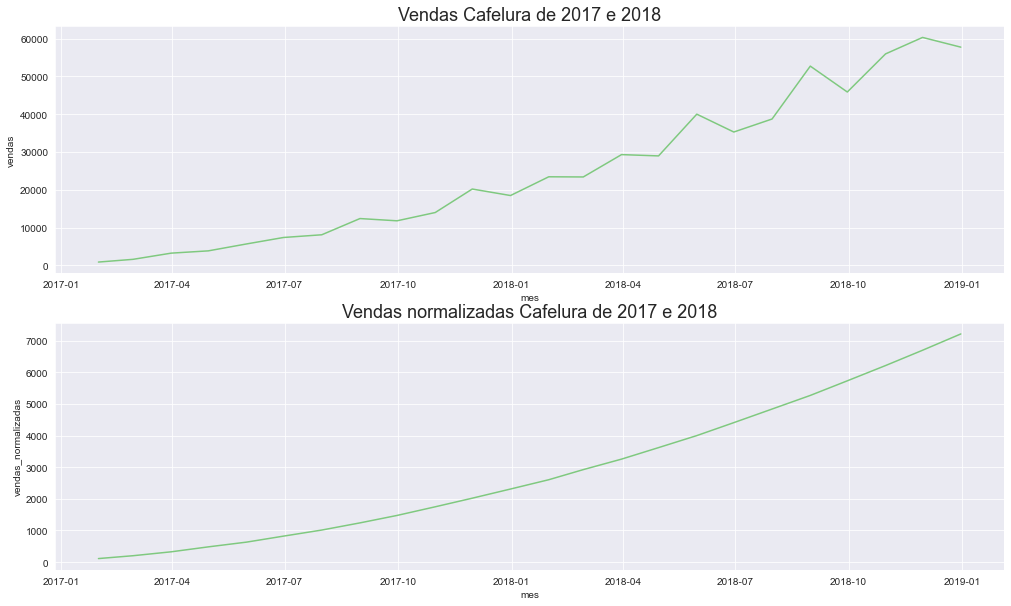

In [147]:
plt.figure(figsize=(17,10))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

plt.show()

## Statsmodels

In [154]:
from statsmodels.tsa.seasonal import seasonal_decompose

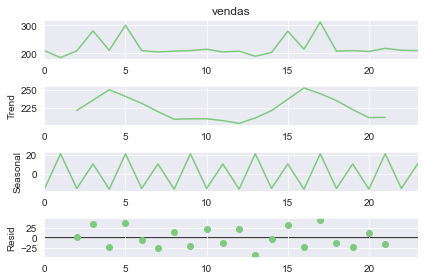

In [178]:
resultado = seasonal_decompose(chocolura['vendas'], period=4)
ax = resultado.plot()

In [180]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [181]:
data = ({
    'observacao': observacao, 
    'tendencia': tendencia, 
    'sazonalidade': sazonalidade, 
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-16.350,NaN
1,185.0,NaN,21.350,NaN
2,209.0,221.125,-15.525,3.400
3,280.0,235.625,10.525,33.850
4,211.0,250.125,-16.350,-22.775


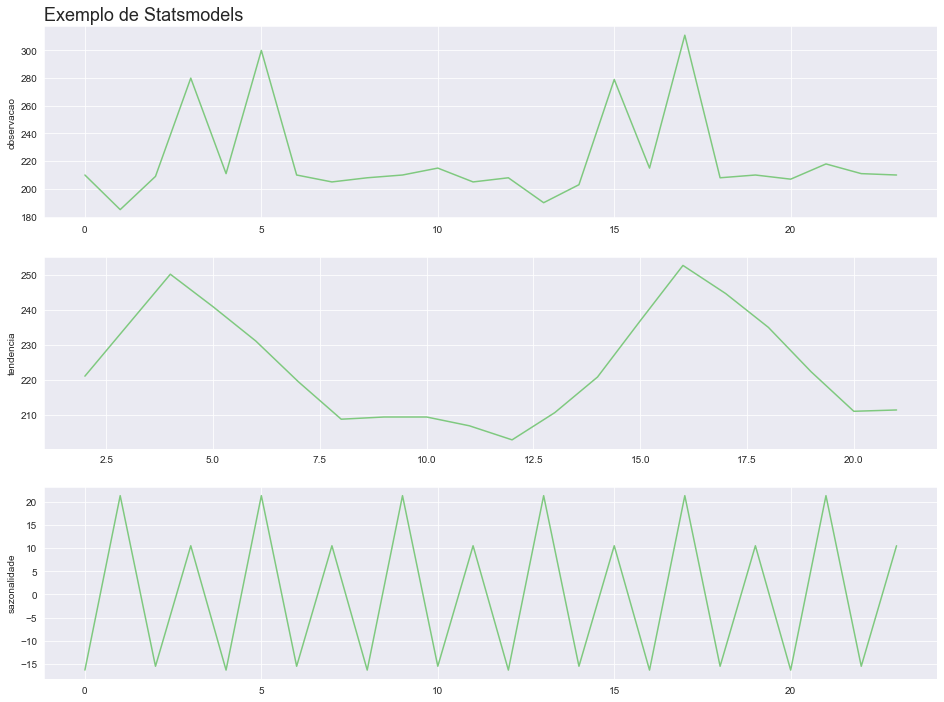

In [182]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 
                'Exemplo de Statsmodels')